In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy.random as rnd
import numpy as np
import math
rnd.seed(20161112)

In [2]:
class FirmExports:
    def __init__(self, exportYears = 20, exportProb = 0.25):
        self.years = exportYears
        self.prob = exportProb
        self.yearsCalendar = []
        self.yearsPseudo = []
        self.calendarGrowth = []
        self.pseudoGrowth = []
        
    def firmGrowth(self):

        self.start = int(rnd.uniform(high = 11)) + 1 # first month shouldn't be January, number 1 to 11
        exportLast = 1

        exportMonths = [0] * (self.years * 12)

        zeroCounter = self.start
        for t in range(self.years * 12 - self.start):
            if rnd.uniform() <= self.prob:
                exportLast *= (0.5 + rnd.uniform())
                exportMonths[self.start + t] = exportLast
                zeroCounter = 0
            else:
                if zeroCounter == 11:
                    exportMonths[self.start + t] = exportLast
                    zeroCounter = 0
                else:
                    zeroCounter += 1

        self.yearsCalendar = []
        self.yearsPseudo = []
        for t in range(self.years -1):
            self.yearsCalendar.append(sum(exportMonths[t * 12 : t * 12 + 12]))
            self.yearsPseudo.append(sum(exportMonths[t * 12 + self.start : t * 12 + self.start + 12]))

        self.calendarGrowth = []
        self.pseudoGrowth = []
        for t in range(self.years - 2):
            try:
                self.calendarGrowth.append(self.yearsCalendar[t + 1] / self.yearsCalendar[t])
                self.pseudoGrowth.append(self.yearsPseudo[t + 1] / self.yearsPseudo[t])
            except ZeroDivisionError:
                print(t)
                print(self.yearsCalendar[t + 1])
                print(self.yearsCalendar[t])
                print(self.yearsPseudo[t + 1])
                print(self.yearsPseudo[t])
                
    def firmCumul(self, fromYear = 0):
        self.fromYear = fromYear
        self.calendarCumul = np.prod(self.calendarGrowth[self.fromYear:]) ** (1 / (self.years - 2 - self.fromYear))
        self.pseudoCumul = np.prod(self.pseudoGrowth[self.fromYear:]) ** (1 / (self.years - 2 - self.fromYear))



In [3]:
class CountryExports:
    def __init__(self, countryFirms = 10, exportYears = 20, exportProb = 0.25):
        self.firms = countryFirms
        self.years = exportYears
        self.prob = exportProb
        self.calendarGrowth = np.zeros(self.years - 2)
        self.pseudoGrowth =np.zeros(self.years - 2)

    def countryGrowth(self):
        self.calendarGrowth = np.zeros(self.years - 2)
        self.pseudoGrowth = np.zeros(self.years - 2)
        
        for f in range(self.firms):
            firm = FirmExports(exportYears = self.years, exportProb = self.prob)
            firm.firmGrowth()
            self.calendarGrowth += np.array(firm.calendarGrowth) 
            self.pseudoGrowth += np.array(firm.pseudoGrowth)
            
        self.calendarGrowth = self.calendarGrowth / self.firms
        self.pseudoGrowth = self.pseudoGrowth / self.firms

    def countryCumul(self, fromYear = 0):
        self.fromYear = fromYear
        self.calendarCumul = np.prod(self.calendarGrowth[self.fromYear:]) ** (1 / (self.years - 2 - self.fromYear))
        self.pseudoCumul = np.prod(self.pseudoGrowth[self.fromYear:]) ** (1 / (self.years - 2 - self.fromYear))

            

In [4]:
class Simulations:
    def __init__(self, simulations = 100, countryFirms = 10, exportYears = 20, exportProb = 0.25):
        self.simulations = simulations
        self.firms = countryFirms
        self.years = exportYears
        self.prob = exportProb
        self.calendarGrowth = np.zeros(self.years - 2)
        self.pseudoGrowth =np.zeros(self.years - 2)
        
    def simulationGrowth(self):
        self.calendarGrowth = np.zeros(self.years - 2)
        self.pseudoGrowth = np.zeros(self.years - 2)
        for s in range(self.simulations):
            country = CountryExports(countryFirms = self.firms, exportYears = self.years, exportProb = self.prob)
            country.countryGrowth()
            self.calendarGrowth += country.calendarGrowth 
            self.pseudoGrowth += country.pseudoGrowth
        self.calendarGrowth = self.calendarGrowth / self.simulations
        self.pseudoGrowth = self.pseudoGrowth / self.simulations
        
    def simulationCumul(self, fromYear = 0):
        self.fromYear = fromYear
        self.calendarCumul = np.prod(self.calendarGrowth[self.fromYear:]) ** (1 / (self.years - 2 - self.fromYear))
        self.pseudoCumul = np.prod(self.pseudoGrowth[self.fromYear:]) ** (1 / (self.years - 2 - self.fromYear))


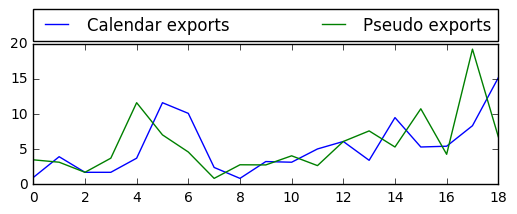

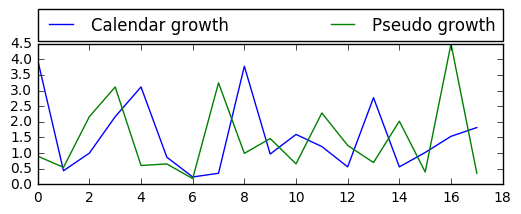

In [12]:
firm = FirmExports(exportYears = 20, exportProb = 0.15)
firm.firmGrowth()

plt.subplot(2,1,1)
calendar = plt.plot(range(firm.years - 1), firm.yearsCalendar, label = 'Calendar exports')
pseudo = plt.plot(range(firm.years - 1), firm.yearsPseudo, label = 'Pseudo exports')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

plt.subplot(2,1,2)
calendar = plt.plot(range(firm.years - 2), firm.calendarGrowth, label = 'Calendar growth')
pseudo = plt.plot(range(firm.years - 2), firm.pseudoGrowth, label = 'Pseudo growth')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [22]:
for i in range(country.years - 2):
    firm.firmCumul(fromYear = i)
    print('Firm diff avg growth from year ' + str(firm.fromYear) + ': ' 
        + str(np.round((firm.calendarCumul - 1) * 100, 2)) + '%, '
        + str(np.round((firm.pseudoCumul - 1) * 100, 2)) + '%, '
        + str(np.round((firm.calendarCumul - firm.pseudoCumul) * 100, 2)) + '%')

Firm diff avg growth from year 0: 16.36%, 3.74%, 12.62%
Firm diff avg growth from year 1: 8.25%, 4.59%, 3.66%
Firm diff avg growth from year 2: 14.55%, 8.93%, 5.62%
Firm diff avg growth from year 3: 15.6%, 4.06%, 11.54%
Firm diff avg growth from year 4: 10.54%, -3.77%, 14.31%
Firm diff avg growth from year 5: 2.07%, -0.3%, 2.37%
Firm diff avg growth from year 6: 3.44%, 3.27%, 0.18%
Firm diff avg growth from year 7: 18.18%, 20.62%, -2.44%
Firm diff avg growth from year 8: 33.21%, 9.26%, 23.95%
Firm diff avg growth from year 9: 18.65%, 10.43%, 8.22%
Firm diff avg growth from year 10: 21.67%, 6.59%, 15.08%
Firm diff avg growth from year 11: 17.03%, 14.2%, 2.83%
Firm diff avg growth from year 12: 16.37%, 1.76%, 14.62%
Firm diff avg growth from year 13: 34.63%, -2.28%, 36.91%
Firm diff avg growth from year 14: 12.4%, 6.24%, 6.17%
Firm diff avg growth from year 15: 41.78%, -14.26%, 56.03%
Firm diff avg growth from year 16: 67.09%, 25.79%, 41.3%
Firm diff avg growth from year 17: 81.72%, -64.

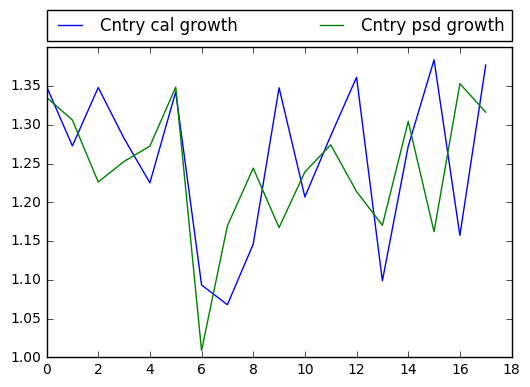

In [15]:
country = CountryExports(countryFirms = 100, exportYears = 20, exportProb = 0.1)
country.countryGrowth()
calendar = plt.plot(range(country.years - 2), country.calendarGrowth, label = 'Cntry cal growth')
pseudo = plt.plot(range(country.years - 2), country.pseudoGrowth, label = 'Cntry psd growth')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [18]:
for i in range(country.years - 2):
    country.countryCumul(fromYear = i)
    print('Country diff avg growth from year ' + str(country.fromYear) + ': ' 
        + str(np.round((country.calendarCumul - 1) * 100, 2)) + '%, '
        + str(np.round((country.pseudoCumul - 1) * 100, 2)) + '%, '
        + str(np.round((country.calendarCumul - country.pseudoCumul) * 100, 2)) + '%')

Country diff avg growth from year 0: 25.25%, 23.97%, 1.28%
Country diff avg growth from year 1: 24.7%, 23.43%, 1.27%
Country diff avg growth from year 2: 24.54%, 22.99%, 1.55%
Country diff avg growth from year 3: 23.88%, 23.02%, 0.86%
Country diff avg growth from year 4: 23.57%, 22.85%, 0.72%
Country diff avg growth from year 5: 23.65%, 22.52%, 1.13%
Country diff avg growth from year 6: 22.81%, 21.54%, 1.26%
Country diff avg growth from year 7: 24.11%, 23.62%, 0.49%
Country diff avg growth from year 8: 25.99%, 24.31%, 1.68%
Country diff avg growth from year 9: 27.32%, 24.29%, 3.02%
Country diff avg growth from year 10: 26.41%, 25.27%, 1.14%
Country diff avg growth from year 11: 27.25%, 25.46%, 1.79%
Country diff avg growth from year 12: 27.02%, 25.13%, 1.89%
Country diff avg growth from year 13: 25.27%, 25.89%, -0.62%
Country diff avg growth from year 14: 29.44%, 28.2%, 1.24%
Country diff avg growth from year 15: 30.18%, 27.46%, 2.72%
Country diff avg growth from year 16: 26.26%, 33.47

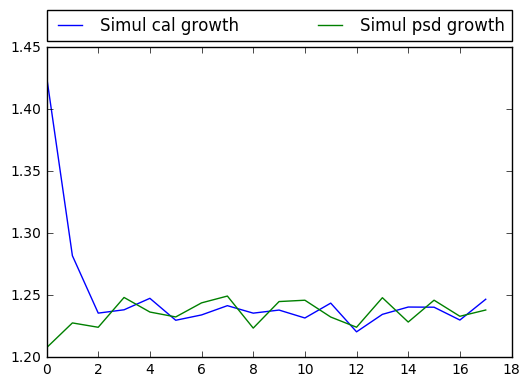

In [19]:
simulation = Simulations(simulations = 100, countryFirms = 100, exportYears = 20, exportProb = 0.1)
simulation.simulationGrowth()
      
calendar = plt.plot(range(simulation.years - 2), simulation.calendarGrowth, label = 'Simul cal growth')
pseudo = plt.plot(range(simulation.years - 2), simulation.pseudoGrowth, label = 'Simul psd growth')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [23]:
for i in range(country.years - 2):
    simulation.simulationCumul(fromYear = i)
    print('Simulation diff avg growth from year ' + str(simulation.fromYear) + ': ' 
        + str(np.round((simulation.calendarCumul - 1) * 100, 2)) + '%, '
        + str(np.round((simulation.pseudoCumul - 1) * 100, 2)) + '%, '
        + str(np.round((simulation.calendarCumul - simulation.pseudoCumul) * 100, 2)) + '%')

Simulation diff avg growth from year 0: 24.93%, 23.54%, 1.39%
Simulation diff avg growth from year 1: 23.95%, 23.7%, 0.25%
Simulation diff avg growth from year 2: 23.69%, 23.76%, -0.06%
Simulation diff avg growth from year 3: 23.7%, 23.85%, -0.15%
Simulation diff avg growth from year 4: 23.69%, 23.78%, -0.09%
Simulation diff avg growth from year 5: 23.61%, 23.78%, -0.18%
Simulation diff avg growth from year 6: 23.66%, 23.83%, -0.17%
Simulation diff avg growth from year 7: 23.68%, 23.78%, -0.1%
Simulation diff avg growth from year 8: 23.63%, 23.66%, -0.03%
Simulation diff avg growth from year 9: 23.64%, 23.8%, -0.17%
Simulation diff avg growth from year 10: 23.61%, 23.72%, -0.1%
Simulation diff avg growth from year 11: 23.68%, 23.59%, 0.09%
Simulation diff avg growth from year 12: 23.56%, 23.64%, -0.08%
Simulation diff avg growth from year 13: 23.86%, 23.88%, -0.03%
Simulation diff avg growth from year 14: 23.95%, 23.65%, 0.3%
Simulation diff avg growth from year 15: 23.92%, 23.92%, -0.